<a href="https://colab.research.google.com/github/Rahul711sharma/Classification-ML/blob/main/Bank_Marketing_PwC_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install shap

In [2]:
import shap

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix,accuracy_score,average_precision_score,roc_auc_score,roc_curve
from sklearn import ensemble
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("/content/bank-full.csv",sep=';')

In [5]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [6]:
df.isna().mean()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
numeric_features = df.describe().columns


In [9]:
categorical_data = [i for i in df.columns if i not in df.describe().columns]

In [10]:
numeric_features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [11]:
for i in categorical_data:
  print(f"{i} :\n {df[i].value_counts()} \n")

job :
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital :
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education :
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default :
 no     44396
yes      815
Name: default, dtype: int64 

housing :
 yes    25130
no     20081
Name: housing, dtype: int64 

loan :
 no     37967
yes     7244
Name: loan, dtype: int64 

contact :
 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month :
 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 

p

In [12]:
pd.DataFrame(df['job'].value_counts())

,job
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303
housemaid,1240


In [13]:
df[categorical_data].head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no


In [14]:
df=df.replace({'yes':1,'no':0})

In [15]:
categorical_data = [i for i in df.columns if i not in df.describe().columns]
categorical_data

['job', 'marital', 'education', 'contact', 'month', 'poutcome']

In [16]:
dummies = pd.get_dummies(df[categorical_data])
for i in dummies.columns:
  df[i] = dummies[i]
  

In [17]:
df.drop(categorical_data,axis=1,inplace=True)

In [18]:
x= df.drop('y',inplace=False,axis=1)
y= df['y']

In [19]:
x.head(3)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


##Models

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(36168, 48)
(9043, 48)


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33908, 48)
(33908,)
(11303, 48)
(11303,)


In [22]:

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=10000)
logit.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
from sklearn.metrics import confusion_matrix
pred_self = logit.predict(x_train)
confusion_matrix(y_train,pred_self)

array([[29233,   711],
       [ 2613,  1351]])

In [24]:
accuracy_score(y_train,pred_self)

0.9019700365695411

In [25]:
accuracy_score(y_test,logit.predict(x_test))

0.8997611253649473

In [26]:
logit.intercept_

array([-0.77746859])

In [27]:
logit.coef_

array([[-8.02524060e-03, -8.40654727e-02,  1.57869673e-05,
        -7.81529598e-01, -5.58672850e-01,  1.21134942e-03,
         4.14465343e-03, -7.67284553e-02, -7.69581268e-04,
         1.00793046e-03,  5.25170963e-02, -2.72764879e-01,
        -2.51766946e-01, -2.83432399e-01, -1.25011466e-01,
         4.64305163e-01, -1.77528994e-01, -2.48291555e-01,
         2.39104668e-01, -1.15813722e-01, -1.85988518e-02,
        -3.45702017e-02, -2.00165278e-01, -3.40746862e-01,
        -2.30939949e-01, -3.77016700e-01, -2.18243406e-01,
        -6.55340089e-02, -1.11057974e-01,  3.12296153e-01,
         8.35267913e-02, -1.16767503e+00,  5.41107836e-02,
        -6.78094374e-01,  2.54042067e-01, -2.70838650e-01,
        -5.84994702e-01, -7.03979438e-01,  2.17026916e-01,
         9.20116419e-01, -4.38776093e-01, -7.40256205e-01,
         6.19420160e-01,  5.80371028e-01, -7.42592429e-01,
        -4.84208941e-01,  1.54124431e+00, -1.08629503e+00]])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


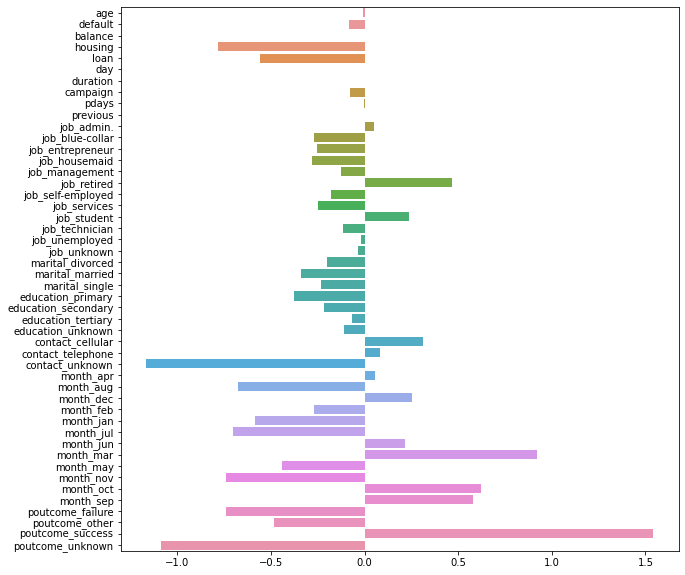

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(logit.coef_[0],x.columns)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [31]:
decision_tree_pred = classifier.predict(x_train)
print(accuracy_score(y_train,decision_tree_pred))

0.894685619912705


In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

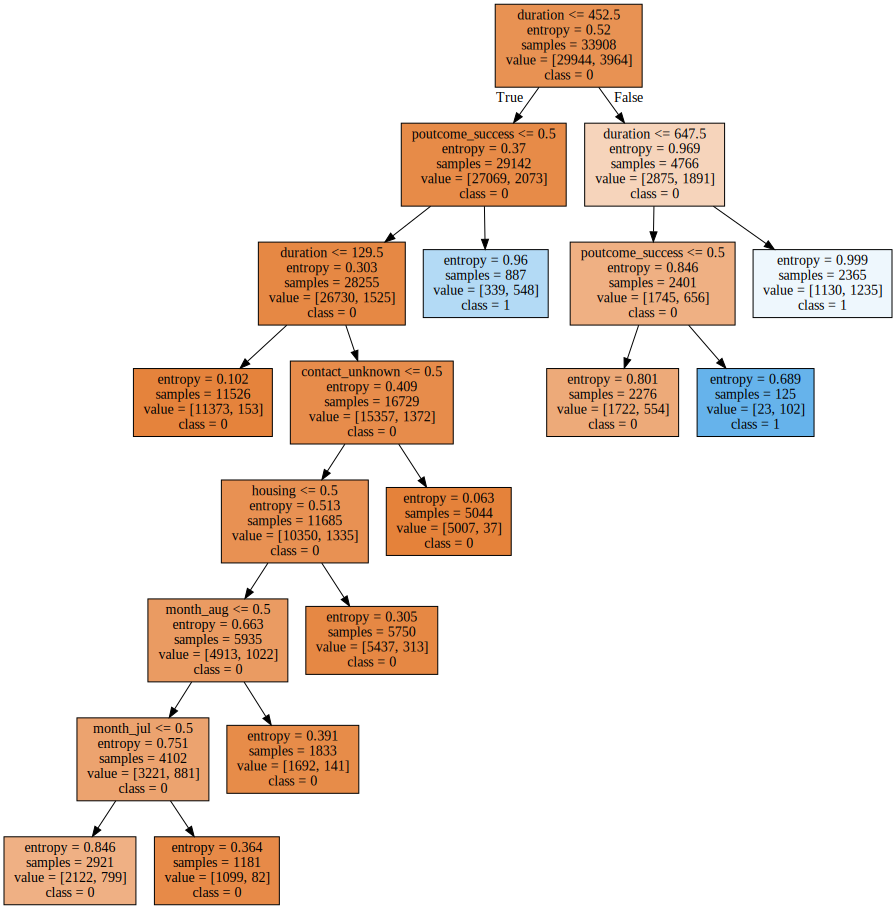

In [33]:

graph = Source(tree.export_graphviz(classifier, out_file=None, feature_names=x_train.columns, class_names=['0', '1'], filled = True))
display(SVG(graph.pipe(format='svg')))

In [34]:
classifier.feature_importances_

array([0.        , 0.        , 0.        , 0.05352861, 0.        ,
       0.        , 0.5313575 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.09549729, 0.        , 0.02427251, 0.        ,
       0.        , 0.        , 0.03113746, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.26420663, 0.        ])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


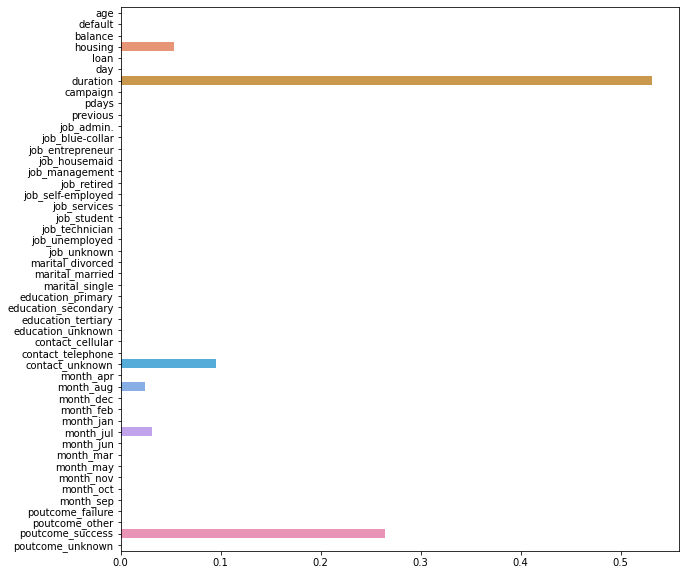

In [35]:
plt.figure(figsize=(10,10))
sns.barplot(classifier.feature_importances_,x.columns)

In [36]:
import sklearn.metrics as met
from sklearn.svm import SVC

In [37]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
met.accuracy_score(y_train,svc_model.predict(x_train))

0.8833903503597971

In [39]:
met.accuracy_score(y_test,svc_model.predict(x_test))

0.8827744846500929

In [40]:
print(met.classification_report(y_test,svc_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      9978
           1       0.50      0.01      0.02      1325

    accuracy                           0.88     11303
   macro avg       0.69      0.50      0.48     11303
weighted avg       0.84      0.88      0.83     11303



In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
#number of trees
n_estimators = [80]

#Maximum depth of tree
max_depth = [8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [43]:
rf_model = RandomForestClassifier()


rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_sampl

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   38.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [44]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 80}

In [45]:
rf_grid.best_score_

0.8957767838050451

In [46]:
rf_model2 = RandomForestClassifier().fit(x_train,y_train)

In [47]:
rf_model2.feature_importances_

array([0.0925793 , 0.00170445, 0.09268795, 0.02172692, 0.00925079,
       0.08191123, 0.26743966, 0.03890174, 0.03953372, 0.01954842,
       0.00874542, 0.00852454, 0.00346257, 0.00309899, 0.01010764,
       0.00526424, 0.0044672 , 0.00626225, 0.00477286, 0.01095921,
       0.00466068, 0.00135863, 0.0073422 , 0.01079624, 0.00949051,
       0.00704543, 0.01197887, 0.01117554, 0.00530056, 0.01009601,
       0.00435241, 0.00838187, 0.01135521, 0.0089356 , 0.00419509,
       0.00814685, 0.00474414, 0.00851415, 0.01065141, 0.01414508,
       0.00953552, 0.0081164 , 0.0101205 , 0.00902779, 0.00844791,
       0.00513062, 0.04918549, 0.0068202 ])

In [48]:
accuracy_score(y_train,rf_model2.predict(x_train))

1.0

In [49]:
accuracy_score(y_test,rf_model2.predict(x_test))

0.9018844554543042

In [50]:
features_imp= pd.DataFrame(sorted(zip(rf_model2.feature_importances_,x.columns),reverse=True))

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


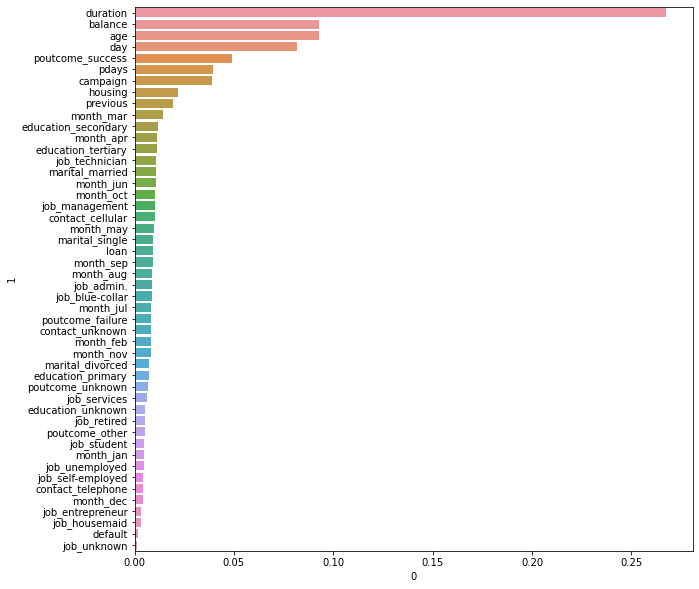

In [51]:
plt.figure(figsize=(10,10))
sns.barplot(features_imp[0],features_imp[1])

In [52]:
shap_sample=shap.sample(x_train,100)

In [53]:
explainer = shap.TreeExplainer(rf_model2)

In [55]:
shap_value = explainer.shap_values(shap_sample)

In [90]:
explainer2 = shap.Explainer(rf_model2)
shap_value2 = explainer2(shap_sample)


In [77]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_value[1], shap_sample,feature_names=shap_sample.columns)

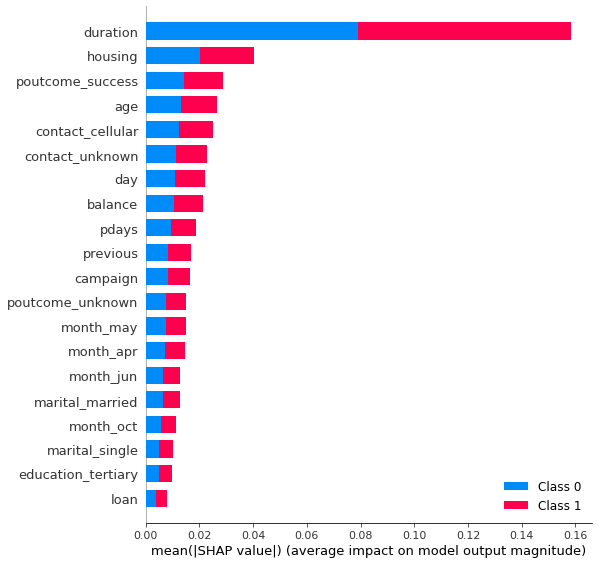

In [57]:
shap.summary_plot(shap_value, shap_sample)